In [ ]:
# %load poi_id.py
#!/usr/bin/python

import sys
import pickle
sys.path.append("../tools/")

from feature_format import featureFormat, targetFeatureSplit
from tester import dump_classifier_and_data

### Task 1: Select what features you'll use.
### features_list is a list of strings, each of which is a feature name.
### The first feature must be "poi".
features_list = ['poi','salary'] # You will need to use more features

### Load the dictionary containing the dataset
with open("final_project_dataset.pkl", "r") as data_file:
    data_dict = pickle.load(data_file)

### Task 2: Remove outliers
### Task 3: Create new feature(s)
### Store to my_dataset for easy export below.
my_dataset = data_dict

### Extract features and labels from dataset for local testing
data = featureFormat(my_dataset, features_list, sort_keys = True)
labels, features = targetFeatureSplit(data)

### Task 4: Try a varity of classifiers
### Please name your classifier clf for easy export below.
### Note that if you want to do PCA or other multi-stage operations,
### you'll need to use Pipelines. For more info:
### http://scikit-learn.org/stable/modules/pipeline.html

# Provided to give you a starting point. Try a variety of classifiers.
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()

### Task 5: Tune your classifier to achieve better than .3 precision and recall 
### using our testing script. Check the tester.py script in the final project
### folder for details on the evaluation method, especially the test_classifier
### function. Because of the small size of the dataset, the script uses
### stratified shuffle split cross validation. For more info: 
### http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.StratifiedShuffleSplit.html

# Example starting point. Try investigating other evaluation techniques!
from sklearn.cross_validation import train_test_split
features_train, features_test, labels_train, labels_test = \
    train_test_split(features, labels, test_size=0.3, random_state=42)

### Task 6: Dump your classifier, dataset, and features_list so anyone can
### check your results. You do not need to change anything below, but make sure
### that the version of poi_id.py that you submit can be run on its own and
### generates the necessary .pkl files for validating your results.

dump_classifier_and_data(clf, my_dataset, features_list)

In [1]:
import sys
import pickle
sys.path.append("../tools/")

from feature_format import featureFormat, targetFeatureSplit
from tester import dump_classifier_and_data

**Task 1: Select Features**

The variable, features_list, is a list of strings, each of which is a feature name.

The first feature must be the dependent, or target, variable, "poi".

The first question that arises for me is where can I see a list of available features? How do I decide what features I want before I have seen the features? 

Anyway, here is one that seems good enough to start with. 

In [2]:
features_list = ['poi','salary','bonus','total_stock_value','long_term_incentive','from_this_person_to_poi','shared_receipt_with_poi' ]

Load the dictionary containing the dataset

In [3]:
with open("final_project_dataset.pkl", "r") as data_file:
    data_dict = pickle.load(data_file)

**Task 2: Eliminate Outliers**
  
No further dicretion is supplied for this task. It seems that I have to fit the model and test it before it makes sense to even decide what an outlier is, no? 

No, I have to look at the data and do exploratory data analysis. 

Now the data is in dictionary form: 

In [4]:
type(data_dict)

dict

In [5]:
data_dict['METTS MARK']['bonus']

600000

In [6]:
counter = 0
bonus_tot = 0
for keys in data_dict.keys():
    if type(data_dict[keys]['bonus'])!= str:
        bonus_tot += float(data_dict[keys]['bonus'])
        counter += 1
    #bonus_tot += float(data_dict[keys]['bonus'])

average = bonus_tot/counter
print average

2374234.60976


Below I find the same sum using Pandas. This is a lot of trouble to find a single summary value so I think it would be best to convert the data set into Pandas and do the initial analysis of outliers there. 

In the course what they did was run some regressions and remove the 10% or so of observations that lead the to the highest residuals in the regression analysis, but I don't know how they do that with the data set's dependent variable being a True/False value. In the course they did everything in an sklearn format which makes me think that that is the way to go here? First I will try some things in Pandas and see if that is any help. 

In [7]:
import pandas as pd
import numpy as np

In [8]:
data_dict_test = data_dict
df = pd.DataFrame(data_dict_test)
df.head()

,ALLEN PHILLIP K,BADUM JAMES P,BANNANTINE JAMES M,BAXTER JOHN C,BAY FRANKLIN R,BAZELIDES PHILIP J,BECK SALLY W,BELDEN TIMOTHY N,BELFER ROBERT,BERBERIAN DAVID,...,WASAFF GEORGE,WESTFAHL RICHARD K,WHALEY DAVID A,WHALLEY LAWRENCE G,WHITE JR THOMAS E,WINOKUR JR. HERBERT S,WODRASKA JOHN,WROBEL BRUCE,YEAGER F SCOTT,YEAP SOON
bonus,4175000,NaN,NaN,1200000,400000,NaN,700000,5249999,NaN,NaN,...,325000,NaN,NaN,3000000,450000,NaN,NaN,NaN,NaN,NaN
deferral_payments,2869717,178980,NaN,1295738,260455,684694,NaN,2144013,-102500,NaN,...,831299,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
deferred_income,-3081055,NaN,-5104,-1386055,-201641,NaN,NaN,-2334434,NaN,NaN,...,-583325,-10800,NaN,NaN,NaN,-25000,NaN,NaN,NaN,NaN
director_fees,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3285,NaN,...,NaN,NaN,NaN,NaN,NaN,108579,NaN,NaN,NaN,NaN
email_address,phillip.allen@enron.com,NaN,james.bannantine@enron.com,NaN,frank.bay@enron.com,NaN,sally.beck@enron.com,tim.belden@enron.com,NaN,david.berberian@enron.com,...,george.wasaff@enron.com,dick.westfahl@enron.com,NaN,greg.whalley@enron.com,thomas.white@enron.com,NaN,john.wodraska@enron.com,NaN,scott.yeager@enron.com,NaN


What's the number for 911? 

In [9]:
df = df.transpose()

In [10]:
df.head()

,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,...,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
ALLEN PHILLIP K,4175000,2869717,-3081055,NaN,phillip.allen@enron.com,1729541,13868,2195,47,65,...,304805,152,False,126027,-126027,201955,1407,2902,4484442,1729541
BADUM JAMES P,NaN,178980,NaN,NaN,NaN,257817,3486,NaN,NaN,NaN,...,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,182466,257817
BANNANTINE JAMES M,NaN,NaN,-5104,NaN,james.bannantine@enron.com,4046157,56301,29,39,0,...,NaN,864523,False,1757552,-560222,477,465,566,916197,5243487
BAXTER JOHN C,1200000,1295738,-1386055,NaN,NaN,6680544,11200,NaN,NaN,NaN,...,1586055,2660303,False,3942714,NaN,267102,NaN,NaN,5634343,10623258
BAY FRANKLIN R,400000,260455,-201641,NaN,frank.bay@enron.com,NaN,129142,NaN,NaN,NaN,...,NaN,69,False,145796,-82782,239671,NaN,NaN,827696,63014


In [11]:
type(df['bonus'])

pandas.core.series.Series

In [12]:
df['bonus'] = df['bonus'].astype(float)

In [13]:
type(df['bonus'])

pandas.core.series.Series

In [14]:
df['bonus'].mean()

2374234.6097560977

In [15]:
df['bonus'].plot(kind='hist')

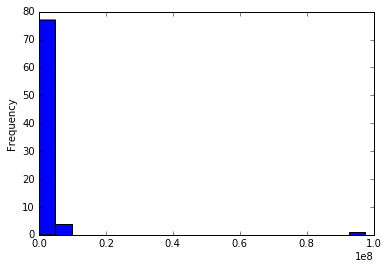

In [16]:
%matplotlib inline
df['bonus'].plot(kind='hist', bins=20)

Well, I seem to have at least one outlier. 

In [17]:
df['bonus'].max()

97343619.0

So if someone got a 97 million dollar bonus he has probably already attracted the attention of the investigators. Now, how to access the person that got the bonus, in a pandas-like way? 

In [18]:
df[df['bonus']==97343619.0]

,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,...,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
TOTAL,97343619,32083396,-27992891,1398517,NaN,311764000,5235198,NaN,NaN,NaN,...,48521928,42667589,False,130322299,-7576788,26704229,NaN,NaN,309886585,434509511


Ok, so we are getting the total mixed in with all the other values. That is the first one to eliminate. 

In [21]:
df[df.index=='TOTAL']

,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,...,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
TOTAL,97343619,32083396,-27992891,1398517,NaN,311764000,5235198,NaN,NaN,NaN,...,48521928,42667589,False,130322299,-7576788,26704229,NaN,NaN,309886585,434509511


Well, that is what would work. Now, how do we remove a row? That I will look up! 

Here is an example bit of code from stackoverflow: 
```
df.drop(df.index[[1,3]])
```
So index works for the string I used above so that combined with drop should work. 

In [22]:
len(df)

146

In [23]:
df_test = df

In [24]:
df_test = df_test.drop('TOTAL')

In [25]:
len(df_test)

145

Ok, so that seems to have worked. Lets test it out.

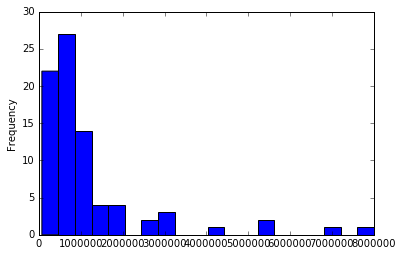

In [26]:
df_test['bonus'].plot(kind='hist', bins=20)

In [27]:
df_test['bonus'].max()

8000000.0

So now the highest bonus is a much more 'reasonable' 8 million. 

Now I have to finish cleaning up the data set. There are three things I need to do: 

* convert df to the now repaired df_test
* change or otherwise deal with the NaN values
* convert the strings to numbers where appropriate

In [28]:
df = df_test

In [29]:
len(df)

145

In [30]:
df['bonus'].mean()

1201773.0740740742

In [31]:
df_test.head(1)

,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,...,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
ALLEN PHILLIP K,4175000,2869717,-3081055,NaN,phillip.allen@enron.com,1729541,13868,2195,47,65,...,304805,152,False,126027,-126027,201955,1407,2902,4484442,1729541


In [32]:
df['deferral_payments'] = df['deferral_payments'].astype(float)

In [33]:
df['deferral_payments'].mean()

841602.5263157894

In [34]:
df['deferred_income'] = df['deferred_income'].astype(float)

In [35]:
df['deferred_income'].mean()

-581049.8125

This is all proving rather tedious. I think I should go to the sklearn documentation and see what they recommend. The whole course was done in sklearn so maybe that would be the way to go here? 

No, sklearn uses 2D arrays and there is a lot of use of Pandas out there on the Youtube videos and tutorials. 

I think for these people the NaN values should be replaced by 0. The fact that we don't have anything for them on this variable is probably indicative of the fact that they did not have any email contact with a poi. On the other hand, there is a guy, Yeager F Scott, who is a poi but has a NaN value for both the to and from poi variables. 

Here is the model for using .fillna() that I found on S.O.
```
df[1].fillna(0, inplace=True)
```
I'll just do this with the string index used above. 

That does not work. Maybe use an assignment? First turn it into a number. 

In [65]:
df['from_poi_to_this_person']=df['from_poi_to_this_person'].astype(float)

In [66]:
df['from_poi_to_this_person'].mean()

38.48965517241379

In [68]:
df['from_poi_to_this_person'].fillna(0, inplace=True)

In [70]:
df['from_poi_to_this_person'].head(3)

ALLEN PHILLIP K       47
BADUM JAMES P          0
BANNANTINE JAMES M    39
Name: from_poi_to_this_person, dtype: float64

Well, maybe I should just make all the na's 0 for now. 

Turn things into integers
fix the missing values (or not?)

In [64]:
df.columns

Index([u'bonus', u'deferral_payments', u'deferred_income', u'director_fees',
       u'email_address', u'exercised_stock_options', u'expenses',
       u'from_messages', u'from_poi_to_this_person',
       u'from_this_person_to_poi', u'loan_advances', u'long_term_incentive',
       u'other', u'poi', u'restricted_stock', u'restricted_stock_deferred',
       u'salary', u'shared_receipt_with_poi', u'to_messages',
       u'total_payments', u'total_stock_value'],
      dtype='object')

Still not sure how the astype(float) function is dealing witht the NaN values.

In [73]:
df['email_address'].head()

ALLEN PHILLIP K          phillip.allen@enron.com
BADUM JAMES P                                NaN
BANNANTINE JAMES M    james.bannantine@enron.com
BAXTER JOHN C                                NaN
BAY FRANKLIN R               frank.bay@enron.com
Name: email_address, dtype: object

In [88]:
df = df.drop('email_address', axis=1)

In [89]:
df.columns

Index([u'bonus', u'deferral_payments', u'deferred_income', u'director_fees',
       u'exercised_stock_options', u'expenses', u'from_messages',
       u'from_poi_to_this_person', u'from_this_person_to_poi',
       u'loan_advances', u'long_term_incentive', u'other', u'poi',
       u'restricted_stock', u'restricted_stock_deferred', u'salary',
       u'shared_receipt_with_poi', u'to_messages', u'total_payments',
       u'total_stock_value'],
      dtype='object')

In [90]:
df.dtypes

bonus                        float64
deferral_payments            float64
deferred_income              float64
director_fees                 object
exercised_stock_options       object
expenses                      object
from_messages                 object
from_poi_to_this_person      float64
from_this_person_to_poi       object
loan_advances                 object
long_term_incentive           object
other                         object
poi                           object
restricted_stock              object
restricted_stock_deferred     object
salary                        object
shared_receipt_with_poi       object
to_messages                   object
total_payments                object
total_stock_value             object
dtype: object

In [91]:
df['to_messages'].head(3)

ALLEN PHILLIP K       2902
BADUM JAMES P          NaN
BANNANTINE JAMES M     566
Name: to_messages, dtype: object

In [92]:
df_t = df

In [93]:
df_t = df_t.astype(float)

In [94]:
df_t.dtypes

bonus                        float64
deferral_payments            float64
deferred_income              float64
director_fees                float64
exercised_stock_options      float64
expenses                     float64
from_messages                float64
from_poi_to_this_person      float64
from_this_person_to_poi      float64
loan_advances                float64
long_term_incentive          float64
other                        float64
poi                          float64
restricted_stock             float64
restricted_stock_deferred    float64
salary                       float64
shared_receipt_with_poi      float64
to_messages                  float64
total_payments               float64
total_stock_value            float64
dtype: object

Wow! That was easy!

In [95]:
df = df.astype(float)

In [97]:
df.dtypes.head()

bonus                      float64
deferral_payments          float64
deferred_income            float64
director_fees              float64
exercised_stock_options    float64
dtype: object

In [98]:
df.head(3)

,bonus,deferral_payments,deferred_income,director_fees,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,loan_advances,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
ALLEN PHILLIP K,4175000,2869717,-3081055,NaN,1729541,13868,2195,47,65,NaN,304805,152,0,126027,-126027,201955,1407,2902,4484442,1729541
BADUM JAMES P,NaN,178980,NaN,NaN,257817,3486,NaN,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,182466,257817
BANNANTINE JAMES M,NaN,NaN,-5104,NaN,4046157,56301,29,39,0,NaN,NaN,864523,0,1757552,-560222,477,465,566,916197,5243487


In [84]:
len(df)

145

**Task 3: Create new feature(s)**

I get lots of ideas for these usually but nothing has occurred to me so far with this data set. 

There may be a interesting effect of persons that don't take a big salary but are compensated in other ways like stock options or high stock values. Maybe a feature like the difference between salary and other forms of compensation? 

One thing that might work is deferred types of income and compensation. The people in the know might be aware that the gains they are making are based on risky assumptions and so might be less likely to take deferred compensation than people that are not so close to the fraud. Maybe there could be some sort of ratio of current to deferred compensation? 

I am going to call it the current_def_ratio. deferred_income and restricted_stock_deferred should be correlated with being a poi and they should be normalized by measures of current compensation which I will total_payments. 

In [107]:
df_t['deferred_income_abs'] = abs(df_t['deferred_income'])

In [110]:
df_t['restricted_stock_deferred'].mean()

621892.8235294118

In [111]:
df_t['total_payments'].mean()

2623421.1774193547

In [112]:
df_t['deferred_income'].mean()

-581049.8125

In [117]:
df_t.columns

Index([u'bonus', u'deferral_payments', u'deferred_income', u'director_fees',
       u'exercised_stock_options', u'expenses', u'from_messages',
       u'from_poi_to_this_person', u'from_this_person_to_poi',
       u'loan_advances', u'long_term_incentive', u'other', u'poi',
       u'restricted_stock', u'restricted_stock_deferred', u'salary',
       u'shared_receipt_with_poi', u'to_messages', u'total_payments',
       u'total_stock_value', u'current_def_ratio', u'deferred_income_abs'],
      dtype='object')

In [108]:
df_t['current_def_ratio'] = ((df_t['deferred_income_abs'] + df_t['restricted_stock_deferred'])/df_t['total_payments'])

In [113]:
df_t['current_def_ratio'].describe()

count    10.000000
mean     -0.078018
std       0.469448
min      -0.913607
25%      -0.288656
50%      -0.036456
75%       0.155372
max       0.658951
Name: current_def_ratio, dtype: float64

There are only 10 values for the thing so maybe it is not that odd that it is negative. Anyway, for a new feature it will do for now. 

In [118]:
df_t.columns

Index([u'bonus', u'deferral_payments', u'deferred_income', u'director_fees',
       u'exercised_stock_options', u'expenses', u'from_messages',
       u'from_poi_to_this_person', u'from_this_person_to_poi',
       u'loan_advances', u'long_term_incentive', u'other', u'poi',
       u'restricted_stock', u'restricted_stock_deferred', u'salary',
       u'shared_receipt_with_poi', u'to_messages', u'total_payments',
       u'total_stock_value', u'current_def_ratio', u'deferred_income_abs'],
      dtype='object')

I am going to get rid of deferred_deferred income and replace it with deferred_income_abs because we don't care about the accounting aspect of the situation, just the magnitude of the deferred income. Besides, I can't keep them both since it would cause multicollinearity problems. 

In [121]:
df_t = df_t.drop('deferred_income', axis=1)

In [123]:
len(df_t)

145

In [124]:
df_t.columns

Index([u'bonus', u'deferral_payments', u'director_fees',
       u'exercised_stock_options', u'expenses', u'from_messages',
       u'from_poi_to_this_person', u'from_this_person_to_poi',
       u'loan_advances', u'long_term_incentive', u'other', u'poi',
       u'restricted_stock', u'restricted_stock_deferred', u'salary',
       u'shared_receipt_with_poi', u'to_messages', u'total_payments',
       u'total_stock_value', u'current_def_ratio', u'deferred_income_abs'],
      dtype='object')

In [125]:
len(df_t.columns)

21

In [159]:
df_t = df_t.transpose()

In [160]:
features_list = df_t.columns

In [162]:
features_list = list(features_list)

In [164]:
features_list.insert(0,'poi')

In [165]:
features_list

['poi',
 'bonus',
 'deferral_payments',
 'director_fees',
 'exercised_stock_options',
 'expenses',
 'from_messages',
 'from_poi_to_this_person',
 'from_this_person_to_poi',
 'loan_advances',
 'long_term_incentive',
 'other',
 'poi',
 'restricted_stock',
 'restricted_stock_deferred',
 'salary',
 'shared_receipt_with_poi',
 'to_messages',
 'total_payments',
 'total_stock_value',
 'current_def_ratio',
 'deferred_income_abs']

In [166]:
features_list.remove('poi')

In [168]:
features_list.remove('poi')

In [170]:
features_list.insert(0,'poi')

In [171]:
features_list

['poi',
 'bonus',
 'deferral_payments',
 'director_fees',
 'exercised_stock_options',
 'expenses',
 'from_messages',
 'from_poi_to_this_person',
 'from_this_person_to_poi',
 'loan_advances',
 'long_term_incentive',
 'other',
 'restricted_stock',
 'restricted_stock_deferred',
 'salary',
 'shared_receipt_with_poi',
 'to_messages',
 'total_payments',
 'total_stock_value',
 'current_def_ratio',
 'deferred_income_abs']

In [141]:
df_t = df_t.transpose()

In [148]:
data_dict_test = df_t.to_dict()

In [149]:
data_dict_test

{'ALLEN PHILLIP K': {'bonus': 4175000.0,
  'current_def_ratio': 0.65895110250060096,
  'deferral_payments': 2869717.0,
  'deferred_income_abs': 3081055.0,
  'director_fees': nan,
  'exercised_stock_options': 1729541.0,
  'expenses': 13868.0,
  'from_messages': 2195.0,
  'from_poi_to_this_person': 47.0,
  'from_this_person_to_poi': 65.0,
  'loan_advances': nan,
  'long_term_incentive': 304805.0,
  'other': 152.0,
  'poi': 0.0,
  'restricted_stock': 126027.0,
  'restricted_stock_deferred': -126027.0,
  'salary': 201955.0,
  'shared_receipt_with_poi': 1407.0,
  'to_messages': 2902.0,
  'total_payments': 4484442.0,
  'total_stock_value': 1729541.0},
 'BADUM JAMES P': {'bonus': nan,
  'current_def_ratio': nan,
  'deferral_payments': 178980.0,
  'deferred_income_abs': nan,
  'director_fees': nan,
  'exercised_stock_options': 257817.0,
  'expenses': 3486.0,
  'from_messages': nan,
  'from_poi_to_this_person': 0.0,
  'from_this_person_to_poi': nan,
  'loan_advances': nan,
  'long_term_incentiv

In [189]:
### Store to my_dataset for easy export below.
my_dataset = data_dict_test

### Extract features and labels from dataset for local testing
data = featureFormat(my_dataset, features_list, sort_keys = True)
labels, features = targetFeatureSplit(data)

# figure out how this code works


In [175]:
my_dataset.keys

<function keys>

So the data_dict has be made from the pandas dictionary that I am making now. 

I could convert the pandas data sets into features and labels directly with the following code but the problem seems to ask us to convert the whole thing into a data_dict(ionary) and let the Udacity script do it for me. 
```
labels = train_df["Survived"].values
features = train_df[list(columns)].values
```
So I still have to find a function that will do the whole thing at once and go from a Pandas DataFrame to a dictionary of dictionaries like we have in the project set up. 

Now for some reason the computer knows that what the labels are. I think that is because the features list has 'poi' as the first variable even though the data stored in the data set has 'poi' somewhere in the middle of the data set. Also, looking at the features list it seems there is no reason to bother with getting rid of variables from the actual data set. You can just omit the things from features list. 

In [176]:
labels[0:3]

[0.0, 0.0, 0.0]

**Task 4: Try a varity of classifiers**
Please name your classifier *clf* for easy export below.
Note that if you want to do PCA or other multi-stage operations,
you'll need to use Pipelines. For more info: [pipeline](http://scikit-learn.org/stable/modules/pipeline.html)

The first one is provided by the courseware to provide a starting point, but we should try others. 

In [179]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()

**Task 5: Tune to >= 0.3 precision and recall** 

Use the course testing script. Check the tester.py script in the final project folder for details on the evaluation method, especially the test_classifier function. Because of the small size of the dataset, the script uses stratified shuffle split cross validation. For more info: [cross_validation](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.StratifiedShuffleSplit.html)

The next cell is an example starting point. Try investigating other evaluation techniques!

In [180]:
from sklearn.cross_validation import train_test_split
features_train, features_test, labels_train, labels_test = \
    train_test_split(features, labels, test_size=0.3, random_state=42)

In [181]:
from tester import test_classifier

Here is the documentation on the test classifier: 
```
test_classifier(clf, dataset, feature_list, folds = 1000)
```

In [198]:
test_classifier(clf, my_dataset, features_list, folds = 1000)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

**Task 6: Dump**
    
Dump the classifier, dataset, and features_list so anyone can check your results. 

You do not need to change anything below, but make sure that the version of poi_id.py that you submit can be run on its own and generates the necessary .pkl files for validating your results.

In [12]:
dump_classifier_and_data(clf, my_dataset, features_list)